Importing Libraries & Data

In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from spacy import displacy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import keras
import tensorflow as tf
from sklearn.pipeline import Pipeline
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import pos_tag
from spacy import displacy
from tensorflow.keras.layers import Bidirectional
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

In [52]:
nltk.download('punkt')
nltk.download('all')
data=pd.read_csv('/content/Language Detection.csv')
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_d

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [53]:
data.shape

(10337, 2)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [55]:
data.describe(include='O').transpose()

,count,unique,top,freq
Text,10337,10267,Jag är ledsen.,3
Language,10337,17,English,1385


In [56]:
data.isna().sum()

Text        0
Language    0
dtype: int64

In [57]:
data['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

### Check for target labels:

Text(0, 0.5, 'Counts')

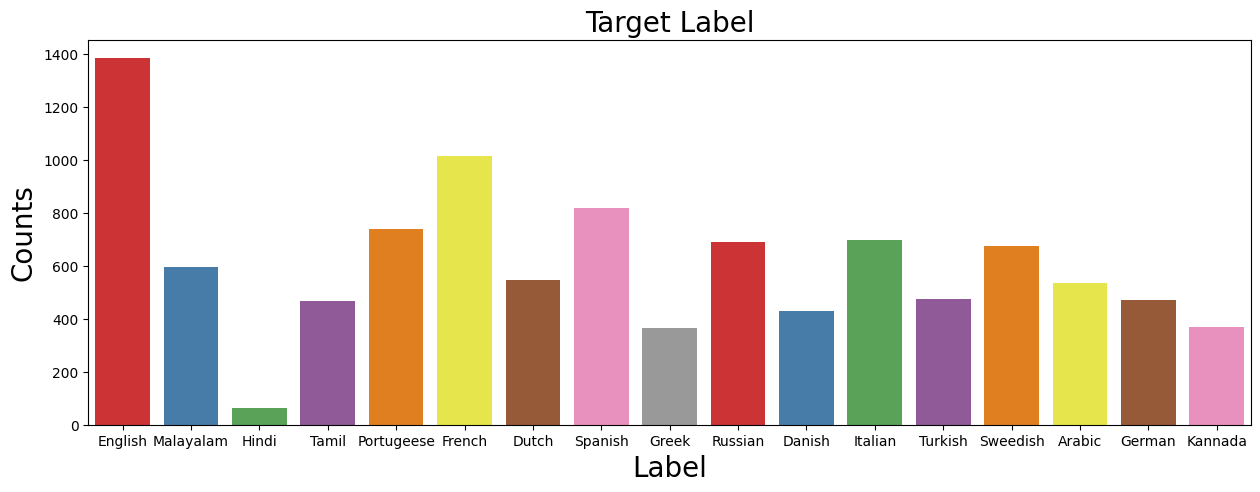

In [58]:
plt.figure(figsize=(15,5))
sns.countplot(x='Language',data=data,palette='Set1')
plt.title('Target Label',fontsize=20)
plt.xlabel('Label',fontsize=20)
plt.ylabel('Counts',fontsize=20)

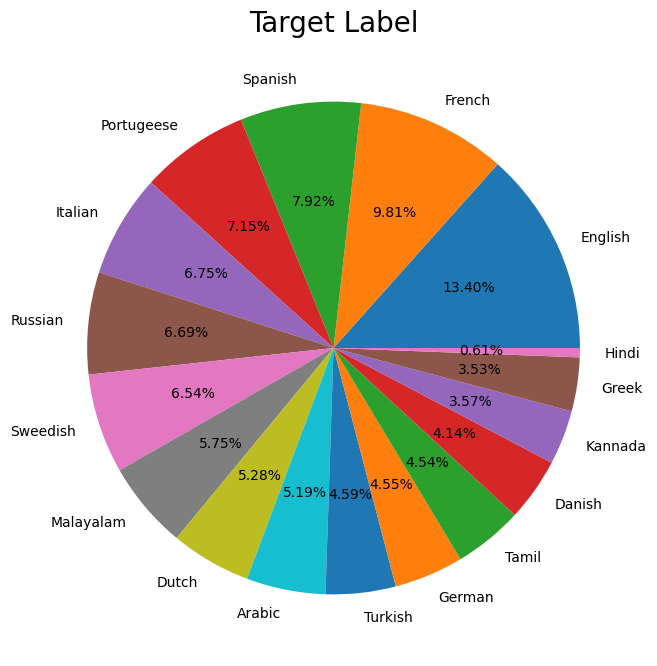

In [60]:
plt.figure(figsize=(8,8))
plt.pie(x = data['Language'].value_counts() ,autopct='%1.2f%%' ,labels=data['Language'].value_counts().index)
plt.title('Target Label',fontsize=20)
plt.show()

In [11]:
X=data.iloc[:,0]
y=data.iloc[:,-1]

In [12]:
X

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object

In [13]:
y

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object

Data Cleaning & Visualization

In [61]:


def word_token(sentence):
    token = word_tokenize(sentence)
    return token

def remove_stop_word(sentence):
    stop_words = set(stopwords.words('english'))
    punct = set(punctuation)
    token = word_token(sentence)
    words = [word.lower() for word in token if word.lower() not in punct and not word.isdigit() and word.lower() not in stop_words]
    return words

def get_pos(sentence):
    nlp = spacy.load('en_core_web_sm')
    tokens = word_token(sentence)
    pos_tags = pos_tag(tokens)
    for word, tag in pos_tags:
        print(f'Word: {word}, POS Tag: {tag}, Meaning: {spacy.explain(tag)}')

def stemming(sentence, language):
    snowball_languages = SnowballStemmer.languages
    if language.lower() in snowball_languages:
        snowball = SnowballStemmer(language=language.lower())
        tokens = word_token(sentence)
        stemmed_words = [snowball.stem(word) for word in tokens]
        for original, stemmed in zip(tokens, stemmed_words):
            print(f'{original} ---> {stemmed}')
    else:
        print(f'Stemmer {language} is not available for the selected language.')

def lemmatization(sentence):
    lemmatizer = WordNetLemmatizer()
    tokens = word_token(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
    for original, lemmatized in zip(tokens, lemmatized_words):
        print(f'{original} ---> {lemmatized}')

def ner_word(sentence):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(sentence)
    if doc.ents:
        for token in doc.ents:
            print(f'{token.text} : {token.label_} : {spacy.explain(token.label_)}')
    else:
        print('No named entities found.')

def visualization(sentence):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(sentence)
    displacy.render(doc, style='dep', jupyter=True, options={'distance': 80})
    displacy.render(doc, style='ent', jupyter=True)


In [62]:
for i in np.random.randint(0,10337,10):
    print(word_token(X[i]))
    print('*'*40)

['[', '36', ']', 'ஜனவரி', '10', ',', '2001', 'அன்று', 'விக்கித்', 'தொழில்நுட்பத்தை', ',', 'நுபீடியாவிற்கு', 'ஆதாரம்', 'கொடுக்கும்', 'திட்டமாக', 'ஆக்க', ',', 'லாரி', 'சாங்கர்', ',', 'நுபீடியாவின்', 'மின்னஞ்சல்', 'பட்டியலூடாக', 'ஒரு', 'பரிந்துரை', 'கொடுத்தார்', '.']
****************************************
['συμφωνώ', 'μαζί', 'σας', '100', '%', '.']
****************************************
['في', 'يوم', '17', 'أغسطس،', '2009', ':', 'وصلت', 'ويكيبيديا', 'الإنجليزية', 'لثلاثة', 'ملايين', 'مقالة', '.']
****************************************
['Different', 'layers', 'may', 'perform', 'different', 'kinds', 'of', 'transformations', 'on', 'their', 'inputs', '.']
****************************************
['posso', 'fermarti', 'lì', 'per', 'un', 'momento', '?']
****************************************
['gjorde', 'mig', 'redo', 'för', 'sängmamma', 'jag', 'hoppas', 'verkligen', 'att', 'min', 'dröm', 'går', 'i', 'uppfyllelse', 'du', 'vet', 'åh', 'narcisa', 'nästa', 'dag', 'som', 'narcisa', 'och', 'h

In [63]:
for i in np.random.randint(0,10337,10):
    print('before')
    print(word_token(X[i]))
    print('after')
    print(remove_stop_word(X[i]))
    print('*'*40)

before
['se', 'alguém', 'conseguiu', 'o', 'emprego', 'dos', 'seus', 'sonhos', 'ou', 'o', 'que', 'quer', 'que', 'você', 'possa', 'dizer', 'com', 'sorte', 'ou', 'alguém', 'entrou', 'na', 'universidade', 'dos', 'seus', 'sonhos', 'como', 'sorte', 'sua', ',', 'esta', 'é', 'uma', 'forma', 'de', 'parabenizar', 'a', 'pessoa', 'sortuda', 'de', 'você', 'ou', 'apenas', 'enfatizar', 'que', 'ele', 'tem', 'sorte', 'de', 'você', 'outra', 'forma', 'de', 'dizer', 'que', 'você', 'está', 'realmente', 'bravo', 'é', 'dizer', 'que', 'eu', 'surtei', 'como', 'se', 'eu', 'estivesse', 'com', 'tanta', 'raiva', 'que', 'eu', 'surtei', ',', 'isso', 'é', 'super', 'raiva', '.']
after
['se', 'alguém', 'conseguiu', 'emprego', 'dos', 'seus', 'sonhos', 'ou', 'que', 'quer', 'que', 'você', 'possa', 'dizer', 'com', 'sorte', 'ou', 'alguém', 'entrou', 'na', 'universidade', 'dos', 'seus', 'sonhos', 'como', 'sorte', 'sua', 'esta', 'é', 'uma', 'forma', 'de', 'parabenizar', 'pessoa', 'sortuda', 'de', 'você', 'ou', 'apenas', 'enfa

In [19]:
X_clean=[]
for sentence in range(len(X)):
    X_clean.append(' '.join(remove_stop_word(X[sentence])))
pd.DataFrame(np.array(X_clean),columns=['Text'])

,Text
0,nature broadest sense natural physical materia...
1,`` nature '' refer phenomena physical world al...
2,study nature large part science
3,although humans part nature human activity oft...
4,word nature borrowed old french nature derived...
...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [20]:
for i in np.random.randint(0,10337,5):
    get_pos(X_clean[i])
    print('*'*40)

Word: bien, POS Tag: NN, Meaning: noun, singular or mass
Word: que, POS Tag: NN, Meaning: noun, singular or mass
Word: les, POS Tag: VBZ, Meaning: verb, 3rd person singular present
Word: fonds, POS Tag: NNS, Meaning: noun, plural
Word: reçus, POS Tag: JJ, Meaning: adjective (English), other noun-modifier (Chinese)
Word: soient, POS Tag: JJ, Meaning: adjective (English), other noun-modifier (Chinese)
Word: chaque, POS Tag: NN, Meaning: noun, singular or mass
Word: année, POS Tag: NN, Meaning: noun, singular or mass
Word: plus, POS Tag: CC, Meaning: conjunction, coordinating
Word: élevés, POS Tag: JJ, Meaning: adjective (English), other noun-modifier (Chinese)
Word: que, POS Tag: NN, Meaning: noun, singular or mass
Word: l'année, POS Tag: NN, Meaning: noun, singular or mass
Word: précédente, POS Tag: NN, Meaning: noun, singular or mass
Word: ils, POS Tag: NNS, Meaning: noun, plural
Word: ne, POS Tag: JJ, Meaning: adjective (English), other noun-modifier (Chinese)
Word: suffisent, POS Tag

In [21]:
for i in np.random.randint(0,10337,5):
    stemming(X_clean[i],y[i])
    print('*'*40)

dans ---> dan
le ---> le
cas ---> cas
de ---> de
l ---> l
’ ---> ’
aa ---> aa
et ---> et
les ---> le
voitures ---> voitur
autonomes ---> autonom
la ---> la
question ---> question
de ---> de
la ---> la
responsabilité ---> respons
en ---> en
cas ---> cas
’ ---> ’
accident ---> accident
se ---> se
pose ---> pos
****************************************
scientific ---> scientif
endeavor ---> endeavor
machine ---> machin
learning ---> learn
grew ---> grew
quest ---> quest
artificial ---> artifici
intelligence ---> intellig
****************************************
direct ---> direct
****************************************
avaient ---> avaient
une ---> une
page ---> pag
wikipédia ---> wikipédi
avant ---> avant
le ---> le
premier ---> premi
tour ---> tour
des ---> de
législatives ---> législ
» ---> »
****************************************
номер ---> номер
три ---> три
учтивый ---> учтив
учтивый ---> учтив
обходительный ---> обходительн
значит ---> знач
быть ---> быт
утонченным ---> утончен
б

In [22]:
for i in np.random.randint(0,10337,5):
    lemmatization(X_clean[i])
    print('*'*40)  

de ---> de
hecho ---> hecho
cuando ---> cuando
el ---> el
entrenamiento ---> entrenamiento
se ---> se
realiza ---> realiza
con ---> con
datos ---> datos
clasificados ---> clasificados
por ---> por
el ---> el
ser ---> ser
humano ---> humano
el ---> el
aprendizaje ---> aprendizaje
automático ---> automático
tiende ---> tiende
crear ---> crear
los ---> los
mismos ---> mismos
segos ---> segos
que ---> que
hay ---> hay
en ---> en
la ---> la
sociedad ---> sociedad
****************************************
nou ---> nou
je ---> je
kunt ---> kunt
gewoon ---> gewoon
antwoorden ---> antwoorden
kan ---> kan
niet ---> niet
klagen ---> klagen
dat ---> dat
alles ---> alles
echt ---> echt
gaaf ---> gaaf
****************************************
não ---> não
acredito ---> acredito
que ---> que
você ---> você
deve ---> deve
estar ---> estar
brincando ---> brincando
comigo ---> comigo
para ---> para
dizer ---> dizer
alguém ---> alguém
para ---> para
sorrir ---> sorrir
e ---> e
para ---> para
ser ---> ser
f

In [23]:
for i in np.random.randint(0,10337,10):
    ner_word(X_clean[i])
    print('*'*40)

un : ORG : Companies, agencies, institutions, etc.
mensaje de texto de nuevo para : PERSON : People, including fictional
animar alguien decirle que se enoje : PERSON : People, including fictional
****************************************
No named entities found.
****************************************
No named entities found.
****************************************
healthcare : ORG : Companies, agencies, institutions, etc.
ibm : ORG : Companies, agencies, institutions, etc.
years : DATE : Absolute or relative dates or periods
billions dollars : MONEY : Monetary values, including unit
****************************************
gracias de todos : PERSON : People, including fictional
importa pero : PERSON : People, including fictional
gracias : CARDINAL : Numerals that do not fall under another type
****************************************
levou mudanças nas : ORG : Companies, agencies, institutions, etc.
****************************************
pacific ocean : LOC : Non-GPE locations, mou

In [24]:
for i in np.random.randint(0,10337,10):
    visualization(X_clean[i])
    print('*'*100)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:215: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


### TfidfVectorizer

In [65]:
tfid=TfidfVectorizer()
PipelineModel = Pipeline([('tfid',tfid)])
X_input=PipelineModel.fit_transform(X_clean)
X_input = pd.DataFrame.sparse.from_spmatrix(X_input)
X_input

,0,1,2,3,4,5,6,7,8,9,...,39476,39477,39478,39479,39480,39481,39482,39483,39484,39485
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
for feature in np.random.randint(0,len(tfid.get_feature_names_out()),200):
    print(tfid.get_feature_names_out()[feature],end=' & ')

أستطع & verspreiden & documentação & रहस & जमर & مكرسة & submergé & primært & δάχτυλα & specify & images & disallowed & redirecionar & pegue & tochter & låter & fransızca & ಚರವ & baserat & ಒಟ & görs & piedade & indicarne & خلالها & rangeringsystem & ενδιαφέρει & språkversion & രസ & sbalordita & تغييرات & fueran & بإصلاح & ekstremt & português & беспокойство & bij & oil & accepteert & vandalism & mittagessen & eb & sana & debería & ترميز & parenté & uddannede & arbetsflöden & assistant & autonomes & udenfor & يقارب & verschiedene & χρησιμοποιείτε & congratulazioni & carencia & ideatori & segnale & റഫർ & vy & háganme & wikipediaartiklars & normer & моей & enciclopédico & tillfälliga & كنت & homogeneizando & kurslitteraturen & alstublieft & реальных & знания & chaud & preoccupata & africans & directeur & debido & åsikt & banimento & considerados & enverrai & इड & kunstmatige & लय & راي & sociologer & слишком & θέση & يجري & likewise & vendiste & правлю & англоцентризме & vrouwen & സജ & πά

In [67]:
pd.DataFrame(tfid.get_feature_names_out(),columns=['Feature Names'])

,Feature Names
0,00
1,000
2,000க
3,001
4,001097666virtual
...,...
39481,ൽപ
39482,ൽവർ
39483,ൾക
39484,ൾപ


In [68]:
dict={}
i=0
for word in pd.unique(y):
    dict[word]=i
    i+=1
def get_code(N):
    for x,y in dict.items():
        if y==N:
            return x
dict   

{'English': 0,
 'Malayalam': 1,
 'Hindi': 2,
 'Tamil': 3,
 'Portuguese': 4,
 'French': 5,
 'Dutch': 6,
 'Spanish': 7,
 'Greek': 8,
 'Russian': 9,
 'Danish': 10,
 'Italian': 11,
 'Turkish': 12,
 'Sweedish': 13,
 'Arabic': 14,
 'German': 15,
 'Kannada': 16}

In [69]:
labels=[]
for word in y:
    labels.append(dict[word])
labels=pd.DataFrame(label,columns=['langauge'])    
labels

,langauge
0,0
1,0
2,0
3,0
4,0
...,...
10332,16
10333,16
10334,16
10335,16


## Spilting data

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_input, label, test_size=0.1, random_state=33)
print('X train shape is :',X_train.shape)
print('X test shape is :',X_test.shape)
print('y test shape is :',y_train.shape)
print('y test shape is :',y_test.shape)

X train shape is : (9303, 39486)
X test shape is : (1034, 39486)
y test shape is : (9303, 1)
y test shape is : (1034, 1)


 **Naive-Baiye Classifier**

In [31]:
naiveb_classifier = MultinomialNB()
naiveb_classifier.fit(X_train, y_train)
naiveb_predictions = naiveb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, naiveb_predictions)
print(accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9535783365570599


**Random Forest Classifier**

In [45]:
rfModel = RandomForestClassifier(criterion = 'gini',n_estimators=400,max_depth=600,random_state=33) 
rfModel.fit(X_train, y_train)
y_pred = rfModel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


<ipython-input-45-df37ab46363e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfModel.fit(X_train, y_train)


Accuracy: 0.937137330754352


**LSTM**


---



In [ ]:
# Split data into sentences and labels
sentences = dict
labels = labels

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
sequences = tokenizer.texts_to_sequences(sentences)

# Pad sequences to have the same length
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Convert labels to one-hot encoding
label_mapping = {label: i for i, label in enumerate(set(labels))}
encoded_labels = [label_mapping[label] for label in labels]
one_hot_labels = np.eye(len(label_mapping))[encoded_labels]

# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)

# Build LSTM model
embedding_dim = 100
hidden_units = 64

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(hidden_units))
model.add(Dense(len(label_mapping), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# Evaluate LSTM model
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy) 

In [35]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(17, activation=tf.nn.softmax)
                                   ])

In [36]:
pred=model.predict(X_test)

33/33 [==============================] - 2s 44ms/step


In [37]:
y_pred=[]
pred=[]
for rows in pred:
    B=np.argmax(rows)
    y_pred.append(B)
    pred.append(get_code(N))
pd.DataFrame(pred,columns=['Prediction'])    

,Predictions
0,Kannada
1,Tamil
2,English
3,Russian
4,Kannada
...,...
1029,Tamil
1030,Malayalam
1031,Spanish
1032,Kannada


In [38]:
def pred_func(sentence):
    sent1=' '.join(remove_stop_word(sentence))
    sent1=PipelineModel.transform([sent1])
    sent1=pd.DataFrame.sparse.from_spmatrix(sent1)
    return get_code(np.argmax(model.predict(sent1)))

In [46]:
#Arabic
pred_func("مرحبا كيف حالك؟")

1/1 [==============================] - 0s 77ms/step


'Spanish'

In [47]:
#English
pred_func('This is English')

1/1 [==============================] - 0s 49ms/step


'English'

In [48]:
#Kannada
pred_func('ಇದು ಕನ್ನಡ')

1/1 [==============================] - 0s 33ms/step


'Kannada'